# Resnet20 Cifar100

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Hi , after many (many , many , many ...) trails I've been able to improve the resnet20 on cifar100 baseline.
see results below (showing best trail) :

Net | Acc
--- | ---
Baseline | 0.6727
MultiSplits | 0.6770
MultiSplits2 | 0.6830
MultiSplits3 | 0.6836

What I've learned:
- I've previously used to measure the TPM in the end of the baseline train, and do splits based on this measured TPMS.<br>
In the case on this baseline net, we can see that the majority of the learning is in iterations 40k-60k (see blue curve below).
so doing a split based on the TPM scores in the 40K - 50K provided more diversity and evidently provided better splits. effectivly spliting in 50K and starting the derived net from the baseline 50K splitted net.<br><br>
- I've not been able to improve by doing a single iterative splits as before (in the previous baseline net a single split showed improvement consistently), I had to do 9 splits togther to improve the baseline (in MultiSplits).<br> MultiSplits2 is doing another 9 splits , and so on

From the number of trails I had to do to improve this baseline, it is evident that there were considerably less margins on this net to exploit. I'm not sure if this is a general resnet conclusion, or a specific conclution to this baseline.

A possible greater potential would be to take a VGG like net and do splits and see if it is measurable to resnet archs.

In [8]:
!grep Test /home/or/caffe/exp/test_resnet20_residual_split/baseline/train.log  | grep Acc | sort -nk 11 | tail -3

I0305 16:47:02.008569 17823 solver.cpp:433]     Test net output #0: Accuracy = 0.6716
I0305 16:26:21.747725 17823 solver.cpp:433]     Test net output #0: Accuracy = 0.6725
I0305 16:24:53.513365 17823 solver.cpp:433]     Test net output #0: Accuracy = 0.6727


In [7]:
!grep Test /home/or/caffe/exp/test_resnet20_residual_split/derived1/train.log  | grep Acc | sort -nk 11 | tail -3

I0310 10:10:09.972316 13098 solver.cpp:433]     Test net output #0: Accuracy = 0.6769
I0310 10:14:48.644430 13098 solver.cpp:433]     Test net output #0: Accuracy = 0.677
I0310 11:05:58.447917 13098 solver.cpp:433]     Test net output #0: Accuracy = 0.677001


In [1]:
!grep Test /home/or/caffe/exp/test_resnet20_residual_split/derived2/train.log  | grep Acc | sort -nk 11 | tail -3

I0311 06:32:40.719007 19493 solver.cpp:433]     Test net output #0: Accuracy = 0.6823
I0311 05:33:39.996145 19493 solver.cpp:433]     Test net output #0: Accuracy = 0.6829
I0311 03:32:35.997335 19493 solver.cpp:433]     Test net output #0: Accuracy = 0.683001


In [2]:
!grep Test /home/or/caffe/exp/test_resnet20_residual_split/derived3/train.log  | grep Acc | sort -nk 11 | tail -3

I0311 11:41:59.882629 23645 solver.cpp:433]     Test net output #0: Accuracy = 0.6815
I0311 11:52:50.924602 23645 solver.cpp:433]     Test net output #0: Accuracy = 0.6817
I0311 11:38:22.816251 23645 solver.cpp:433]     Test net output #0: Accuracy = 0.683602


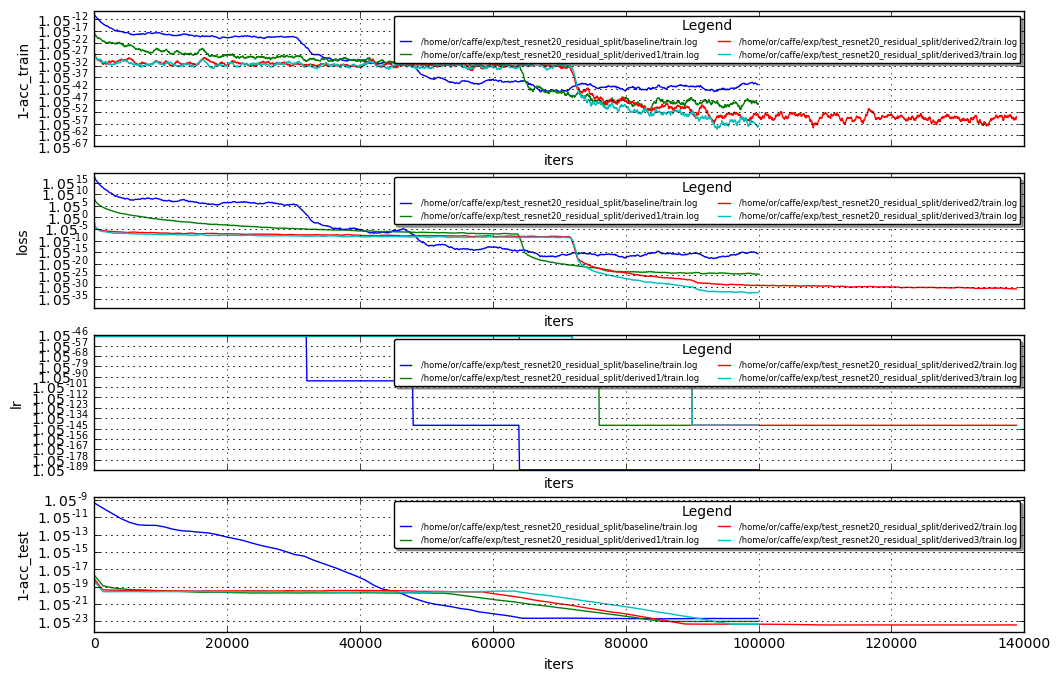

In [4]:
%run ~/caffe/utils/plot_loss.py ~/caffe/exp/test_resnet20_residual_split/baseline/train.log \
                                ~/caffe/exp/test_resnet20_residual_split/derived1/train.log \
                                ~/caffe/exp/test_resnet20_residual_split/derived2/train.log \
                                ~/caffe/exp/test_resnet20_residual_split/derived3/train.log --no_refresh

### Ilustration of the Splits complexity in MultiSplits

(-0.5, 876.5, 1474.5, -0.5)

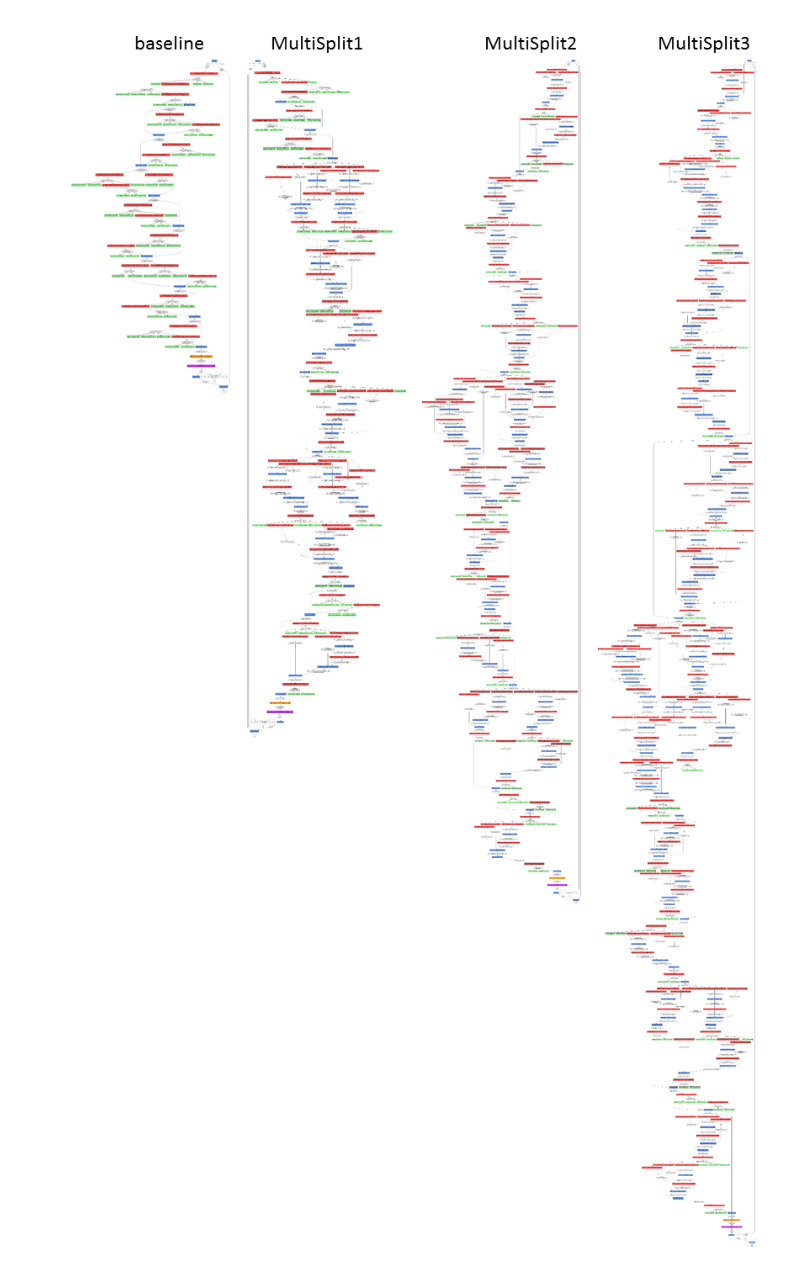

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
plt.figure(figsize=(16,16))
plt.imshow(Image.open('illustration.png'))
plt.axis('off')

### Identity Split (Skip split)

See below description on the skip split: we have the "layer"_split1,"layer"_split2 as before + skip connection<br>
where the skip connection is a 1x1 convolution with identity initialization and 0 lr.<br>
is the case the split2 stride is greater then '1' I've tried two flows:<br>
- same stride in skip connection -> meaning the skip connection samples every "stride" pixel (every second pixel for example)
- same as before, but the skip kernel size is "stride"X"stride" and is initialized with 1/(stride^2) -> average pooling 

###### NOTE: the skip split test was done with the extact same parameter of the residual skip (MultiSplits)

(-0.5, 2898.5, 1074.5, -0.5)

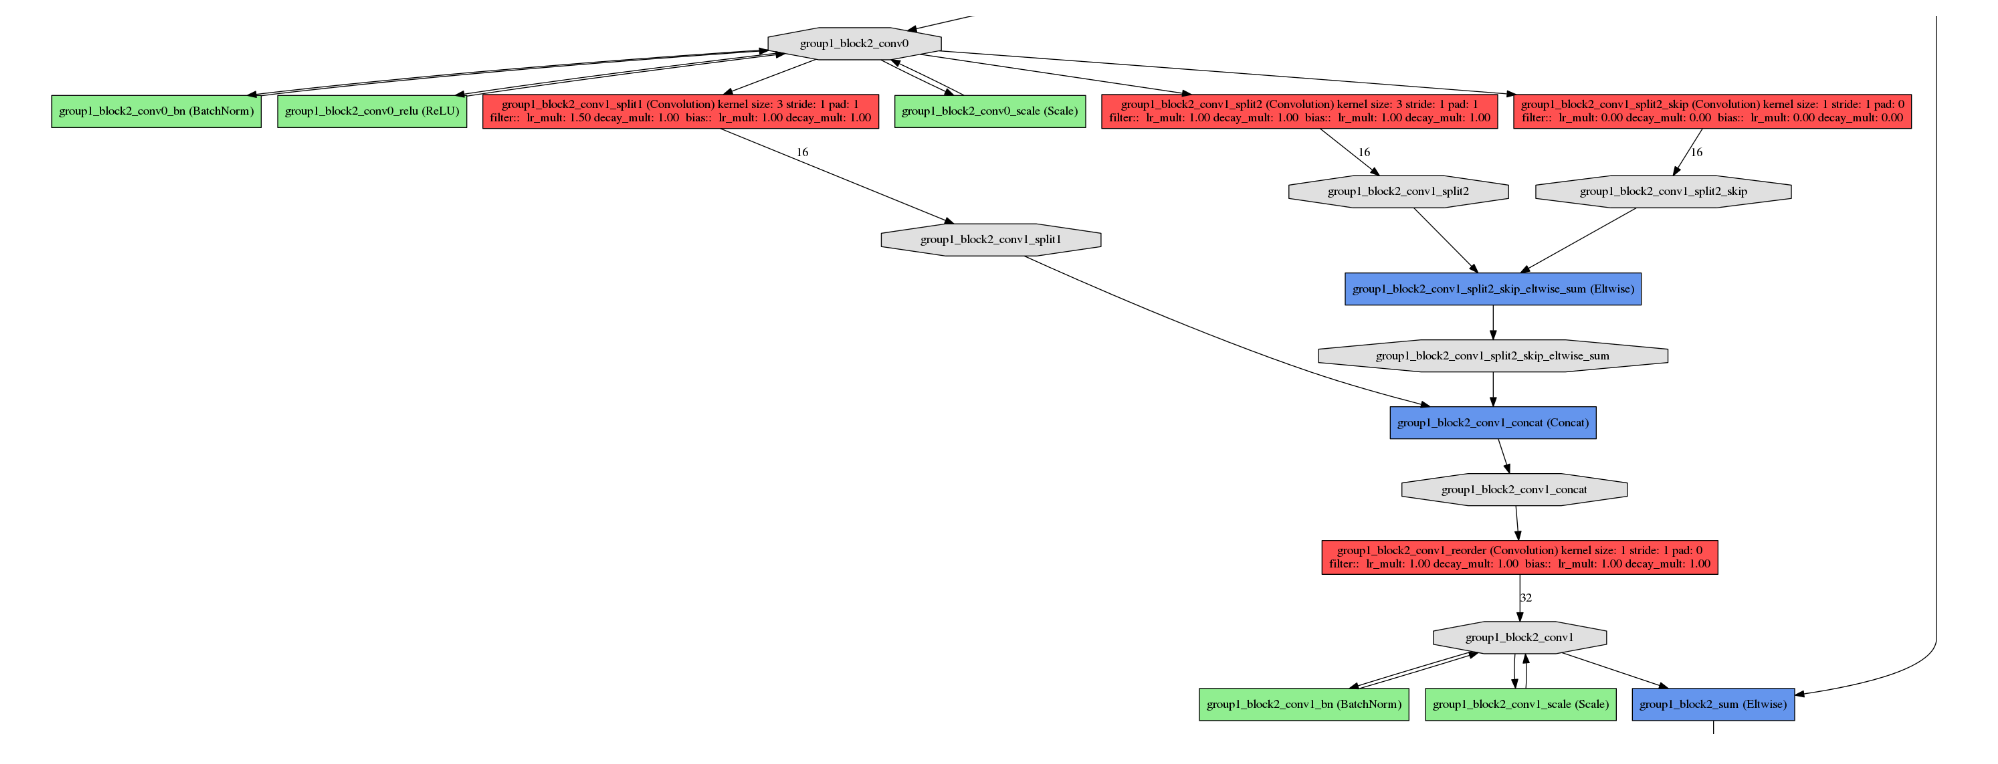

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
plt.figure(figsize=(25,25))
plt.imshow(Image.open('net_skip_split_crop.png'))
plt.axis('off')


Net | Acc
--- | ---
Baseline | 0.6727
SkipSplit_1x1 | 0.676
SkipSplit_AvgPooling | 0.662

In [34]:
!grep Test /home/or/or5/caffe/exp/test_resnet20_residual_split/baseline/train.log  | grep Acc | sort -nk 11 | tail -3

I0305 16:47:02.008569 17823 solver.cpp:433]     Test net output #0: Accuracy = 0.6716
I0305 16:26:21.747725 17823 solver.cpp:433]     Test net output #0: Accuracy = 0.6725
I0305 16:24:53.513365 17823 solver.cpp:433]     Test net output #0: Accuracy = 0.6727


In [29]:
!grep Test /home/or/or5/caffe/exp/test_resnet20_skip_split/derived1_1x1/train.log  | grep Acc | sort -nk 11 | tail -3

I0311 03:04:07.529115 14482 solver.cpp:433]     Test net output #0: Accuracy = 0.674301
I0311 02:34:03.506747 14482 solver.cpp:433]     Test net output #0: Accuracy = 0.676
I0311 02:32:28.534746 14482 solver.cpp:433]     Test net output #0: Accuracy = 0.676101


In [30]:
!grep Test /home/or/or5/caffe/exp/test_resnet20_skip_split/derived1_avg_downsample/train.log  | grep Acc | sort -nk 11 | tail -3

I0311 09:30:55.269381 19581 solver.cpp:433]     Test net output #0: Accuracy = 0.6619
I0311 08:16:41.942193 19581 solver.cpp:433]     Test net output #0: Accuracy = 0.6627
I0311 08:14:18.186910 19581 solver.cpp:433]     Test net output #0: Accuracy = 0.6629


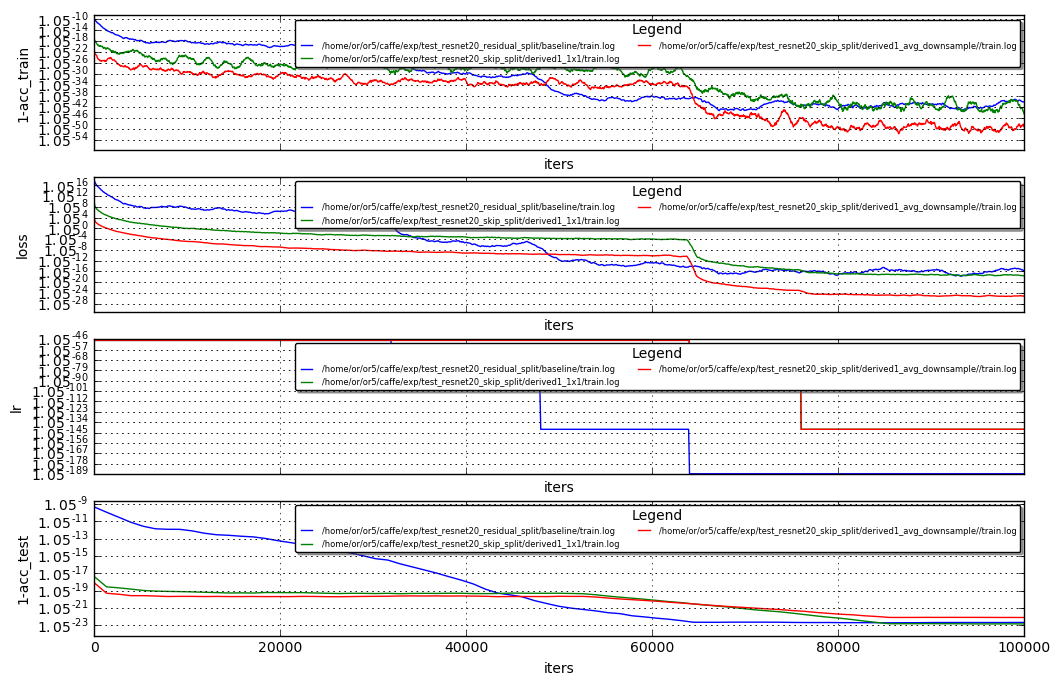

In [27]:
%run ~/caffe/utils/plot_loss.py /home/or/or5/caffe/exp/test_resnet20_residual_split/baseline/train.log \
                                /home/or/or5/caffe/exp/test_resnet20_skip_split/derived1_1x1/train.log \
                                /home/or/or5/caffe/exp/test_resnet20_skip_split/derived1_avg_downsample//train.log \
                                --no_refresh